### Please install the required Python modules/SDKs

In [1]:
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

Could not find conda environment: ai-azure-c1
You can list all discoverable environments with `conda info --envs`.



## Importing utility functions and Python modules

In [2]:
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [3]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

## Importing Custom Vision Modules

In [4]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import os, time, uuid

## Please enter prediction resource specific details below

In [5]:
# Replace with valid values
ENDPOINT ="https://nayanacustomvision-prediction.cognitiveservices.azure.com"
prediction_key = "6b7c1fe2bea0431a8a3b4259749591e6"

In [6]:
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)

In [7]:
predictor.api_version

'3.1'

### If you want to use a test image from local file system, follow these steps:
* We have saved three test images within this workspace environment. 

In [8]:
# Get current working directory
# The output will give you the "local_image_path" used in the cell below
!pwd

/Users/nayanex/Desktop/Udacity/AI-Engineer-using-Microsoft-Azure-Nanodegree-Program/Building Computer Vision Solutions with Azure/Lesson 5 - Image Classification and Object Detection


In [9]:
# To list the folders/files in your current working directory
# The name of any image file can be used as "file_name" in the cell below
!ls

L5 Demo 1 - Predict API.ipynb          architecture-images
L5 Demo 2 - Image Classification.ipynb interior-images
L5 Image Classification Exercise.ipynb nature-images
README.md                              test-architecture
animals                                test-nature


In [10]:
local_image_path = 'test-nature'
file_name = 'test-nature-01.jpeg'

In [11]:
project_id = 'ec94211a-25da-432c-9e45-721935adfe0e'
publish_iteration_name = "Iteration1"

In [12]:
with open(os.path.join (local_image_path, file_name), "rb") as image_contents:
    results = predictor.classify_image(project_id, publish_iteration_name, image_contents.read())

    # Display the results.
    for prediction in results.predictions:
        print("\t" + prediction.tag_name +
              ": {0:.2f}%".format(prediction.probability * 100))

	Nature: 98.31%
	Architecture: 0.98%
	Interior: 0.70%


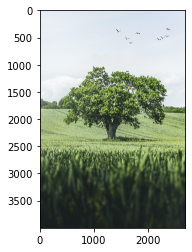

In [13]:
with open(os.path.join (local_image_path, file_name), 'rb') as img_code:
    img_view_ready = Image.open(img_code)
    plt.figure()
    plt.imshow(img_view_ready)

### If you want to use a test image from the Internet, follow these steps:
* The test image used in the demo is https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/test-nature-02.jpg. You can also use another image of your own.

In [14]:
test_image_url = "https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/test-nature-02.jpg"

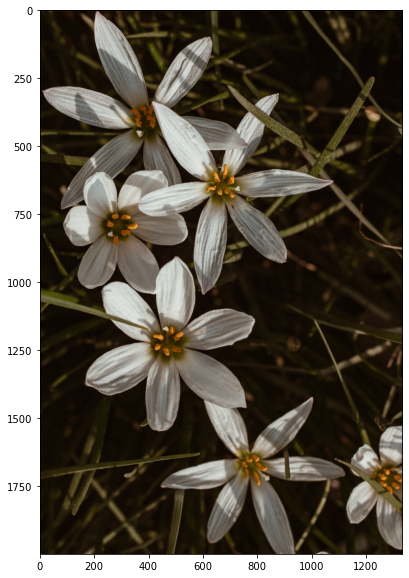

In [15]:
show_image_in_cell(test_image_url)

In [16]:
results = predictor.classify_image_url(project_id,publish_iteration_name,url=test_image_url)

In [17]:
# Display the results form the URL image
for prediction in results.predictions:
    print("\t" + prediction.tag_name +
          ": {0:.2f}%".format(prediction.probability * 100))

	Nature: 98.79%
	Architecture: 0.96%
	Interior: 0.25%
